In [61]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v', '<', '>', 'p', 'h', 'D')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Determine the min and max values for the two features
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Predict class labels for the grid
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    # Plot decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        if markers[idx] == 'x':  # Handle the unfilled marker separately
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, color=colors[idx],
                        marker=markers[idx], label=cl)
        else:
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, color=colors[idx],
                        marker=markers[idx], label=cl,
                        edgecolor='black')
    
    # Highlight test samples
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidths=1, marker='o',
                    s=100, label='test set')

    plt.legend(loc='upper left')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    plt.show()
            
# Load the iris dataset
X, y = load_iris(return_X_y=True)

# Select setosa and versicolor
X = X[:, [2, 3]]

# split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 지도학습 (Supervised Learning)

알고리즘이 학습 데이터(입력과 출력 쌍)를 사용하여 입력 데이터에 대한 예측 모델을 학습하는 과정

주요 특징
- 레이블이 있는 데이터를 사용해 학습
- 예측 모델을 학습해, 입력 데이터에 대한 출력 예측
- 모델의 예측 정확도를 높여 데이터에 대한 일반화 능력 극대화가 목표

주요 분류
- 회귀 (Regression): 연속적인 값 예측
- 분류 (Classification): 클래스 값 예측

## 기본 용어

일반화 (Generalization)
- 모델이 학습데이터에서 학습한 내용을 기반으로 새로운 데이터에 대해 얼마나 잘 예측할 수 있는지를 의미
- 좋은 일반화 능력을 가진 모델은 학습 데이터뿐만 아니라 새로운 데이터에서도 높은 성능
- 학습데이터와 테스트데이터(새로운 데이터)의 성능이 유사할 때

과대적합 (Overfitting)
- 모델이 학습 데이터에 너무 잘 맞추려는 경향을 보여, 학습 데이터에 포함된 노이즈까지 학습해버리는 현상
- 과대적합된 모델은 학습 데이터에서 높은 정확도를 보이지만, 테스트 데이터에서는 성능이 크게 떨어짐
- 복잡한 모델에서 주로 발생

과대적합 (Overfitting) 해결방법
- 규제 (Regularization): 모델의 복잡성을 제한하는 기법 사용(예: L1, L2 정규화)
- 교차 검증 (Cross-Validation): 데이터를 여러 번 나누어 학습하고 평가하여 과대적합을 방지
- 가지치기 (Pruning): 결정 트리의 경우 불필요한 가지를 제거하여 모델을 단순화
- 앙상블 학습 (Ensemble Learning): 여러 모델을 결합하여 과대적합을 줄이는 방법

과소적합 (Underfitting)
- 모델이 학습 데이터의 패턴을 충분히 학습하지 못하는 현상
- 학습 데이터와 테스트 데이터 모두에서 낮은 정확도를 보임
- 너무 단순한 모델(예: 단순 선형 회귀)에서 주로 발생

과소적합 (Underfitting) 해결방법
- 모델 복잡도 증가: 더 복잡한 모델 사용(예: 다항 회귀, 결정 트리)
- 특성 공학 (Feature Engineering): 중요한 특성을 추가하거나 기존 특성을 변환하여 모델의 표현력 향상
- 더 많은 데이터 사용: 더 많은 데이터를 사용하여 모델이 충분히 학습할 수 있도록 함

## 프로세스

1. 데이터 수집 및 전처리: 데이터를 수집하고 모델이 학습할 수 있는 형식으로 정리 및 정제
2. 훈련 데이터와 테스트 데이터로 분할: 데이터를 훈련 데이터와 테스트 데이터로 분할
3. 모델 선택 및 학습: 적절한 지도학습 알고리즘을 선택하고 훈련 데이터를 사용하여 모델을 학습
4. 모델 평가 및 피드백: 검증 데이터를 사용하여 모델의 성능을 평가, 필요한 경우 모델 변경 또는 하이퍼파라미터 조정
5. 최종 모델 평가 및 배포: 테스트 데이터를 사용하여 최종 모델의 성능을 평가하고 실제 적용을 위해 모델을 배포

## K-최근접 이웃 (K-Nearest Neighbors, K-NN)

- 클래스를 예측하기 위해 그 데이터 포인트와 가장 가까운 K개의 이웃을 기반으로 결정을 내리는 알고리즘
- 분류 (Classification)와 회귀 (Regression) 문제 모두에 사용
- 학습 단계에서 모델을 학습하지 않고, 예측 시에 훈련 데이터와의 거리를 계산

주요 특징
- **비모수적 방법**: K-NN은 데이터 분포에 대해 특정한 가정을 하지 않음
- **메모리 기반**: 모델을 학습하는 과정이 없고, 예측 시에 모든 학습 데이터를 메모리에 저장하고 사용
- **단순성**: 구현이 매우 간단하지만, 강력한 성능을 발휘

기본 원리
1. 거리측정
   - 새로운 데이터 포인트와 기존 데이터 포인트들 사이의 거리를 계산
   - 일반적으로 유클리드 거리가 사용되지만, 다른 거리 척도(예: 맨해튼 거리, 코사인 유사도)도 사용 가능
2. 이웃 선택
   - 계산된 거리 값을 기준으로 가장 가까운 K개의 이웃을 선택
3. 결정
   - 분류: K개의 이웃 중 가장 많이 등장한 클래스를 새로운 데이터 포인트의 클래스로 예측
   - 회귀: K개의 이웃의 평균 값을 새로운 데이터 포인트의 예측 값으로 사용

수식(유클리드 거리):

$$
d(x, y) = \sqrt{\sum_{i=1}^n(x_i - y_i)^2}
$$

작은 K 값은 모델이 복잡해져 과대적합이 발생하고, 큰 K 값은 모델이 단순해져 과소적합이 발생 가능하다. 

따라서, 교차 검증 (Cross-Validation)으로 다양한 K 값을 시도하여 최적의 K 값을 탐색해야 한다.

K-NN 개선방법
1. 가중치 부여: 가까운 이웃에게 더 큰 가중치를 부여
2. 차원축소: 고차원 데이터를 저차원으로 변환
3. 효율적인 거리 계산: KD 트리 또는 불 트리 사용

K-NN 장점
- 단순하고 이해하기 쉬움: 규현과 이해가 매우 간단
- 모델 학습 과정이 없음: 데이터가 추가될 때마다 모델을 재학습할 필요가 없음
- 다양한 문제에 적용 가능: 분류와 회귀 문제 모두에 사용 가능

K-NN 단점
- 계산 비용이 높음: 예측 시에 모든 데이터를 비교해야 하므로, 데이터가 많을 경우 계산 비용이 높음
- 공간 복잡도: 모든 학습 데이터를 저장해야 하므로, 메모리 사용량이 큼
- K 값 선택의 어려움: 적절한 K 값을 선택해야만 함
- 희소한 데이터에서 성능 저하: 데이터가 희소한 경우 성능 저하 가능성이 큼

예제

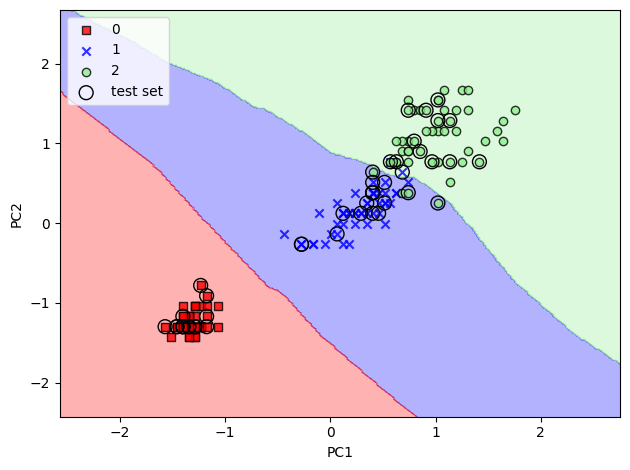

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



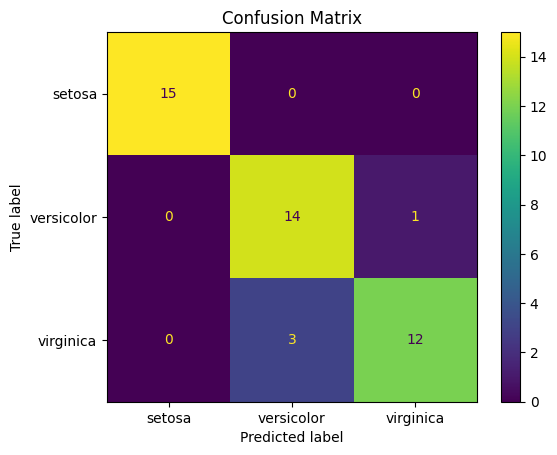

In [63]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = knn.predict(X_test_std)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_estimator(knn, X_test_std, y_test, display_labels=load_iris().target_names, cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

## 로지스틱 회귀 (Logistic Regression)

- 입력된 독립 변수들의 선형 결합을 통해 종속 변수(이진 변수)의 확률을 에측하는 통계적 모델
- 입력 변수들의 선형 결합을 통해 특정 사건이 발생할 확률을 예측
- 다중 클래스 분류 문제에서도 확장하여 사용 가능

주요 특징
- **분류 알고리즘**: 이진 분류 문제를 해결하기 위해 주로 사용
- **확률 출력**: 예측 결과를 0과 1 사이의 확률로 출력
- **선형 회귀와의 차이점**: 선형 회귀는 연속적인 값을 예측하지만, 로지스틱 회귀는 이진 값을 예측

기본 원리
1. 선형 모델
   - 입력 변수 $X$와 가중치 $W$의 선형 결합을 계산, 최종적으로 $W$와 $b$를 학습
   $$
   z = W^TX + b
   $$
2. 로지스틱 함수 (Sigmoid 함수)
   - 선형 결합의 결과를 로지스틱 함수에 적용하여 0과 1 사이의 확률 값을 계산
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
3. 결정경계
   - 출력 확률을 0.5를 기준으로 분류
   - 출력 확률이 0.5 이상이면 양성 클래스(1)로, 0.5 미만이면 음성 클래스(0)로 분류
   $$
   P(Y = 1 | X) = \sigma(W^TX + b) = \frac{1}{1 + e^{-(W^TX+b)}}
   $$

로지스틱 회귀 장점
- 해석 용이성: 모델의 출력이 확률이기 때문에 결과 해석이 용이
- 효율성: 계산 비용이 낮고, 큰 데이터셋에서도 빠르게 학습 가능

로지스틱 회귀 단점
- 선형 결정 경계: 비선형 데이터에서는 성능이 저하
- 이진 분류 제한: 다중 클래스 분류 문제에서는 소프트맥스와 같은 확장 필요(다중 클래스 로지스틱 회귀)

예제

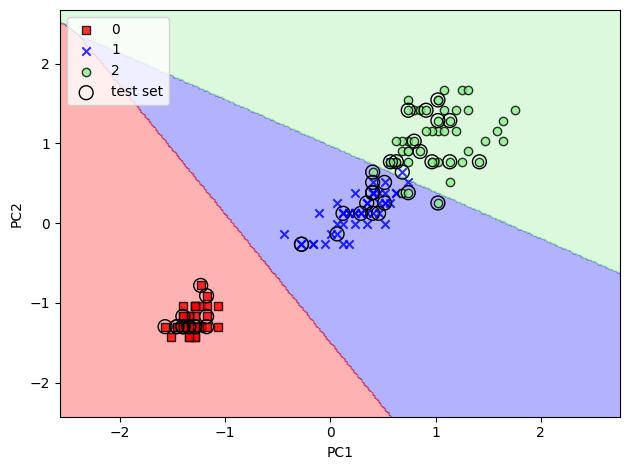

In [64]:
from sklearn.linear_model import LogisticRegression

lrgd = LogisticRegression(max_iter=10000)
lrgd.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lrgd,
                      test_idx=range(105, 150))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



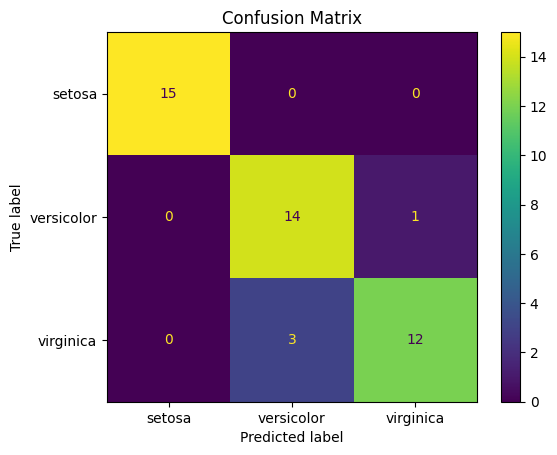

In [65]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = lrgd.predict(X_test_std)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_estimator(lrgd, X_test_std, y_test, display_labels=load_iris().target_names, cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

## 서포트 벡터 머신 (Support Vector Machine)

- 데이터를 분리하는 최적의 초평면을 찾는 지도학습 알고리즘
- 선형 분리가 불가능한 데이터(비선형 데이터)에 대해서도 작동(커널)
- 다중 클래스 분류 문제에서도 확장하여 사용 가능

주요 특징
- **결정 초평면**: 두 클래스를 분리하는 최적의 초평면 탐색
- **서포트 벡터**: 결정 초평면과 가장 가까운 데이터 포인트들로, 초평면을 결정하는 데 중요한 역할
- **마진 최대화**: 초평면과 서포트 벡터 사이의 거리를 최대화하여 일반화 성능을 높임

기본 원리
1. 초평면 (Hyperplane)
   - 두 클래스 간의 데이터를 분리하는 고차원 공간의 평면
   - $\mathbf{w}$: 초평면의 법선 벡터, $\mathbf{x}$: 데이터 포인트, $b$: 절편
    $$
    \mathbf{w} \cdot \mathbf{x} + b = 0
    $$
2. 마진 (Margin)
   - 초평면과 가장 가까운 데이터 포인트(서포트 벡터) 간의 거리
   - $||w||$: 법선 벡터의 크기
   $$
   M = \frac{2}{||\mathbf{w}||}
   $$
3. 최적화
   - SVM의 목표는 마진을 최대화하는 초평면 탐색
  $$
   \underset{\mathbf{w}, b}{\text{min}} \frac{1}{2}||\mathbf{w}||^2, \mathbf{y}_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \forall i\\
   \mathbf{y}_i: \text{label of data point } \mathbf{x}_i
  $$

커널트릭(Kernel Trick)
- SVM은 본질적으로 선형 분리 알고리즘
- 비선형 데이터에 커널트릭을 사용해 데이터를 고차원 공간으로 변환하여 선형적으로 분리
- 이러한 매핑을 명시적으로 수행하지 않고도 고차원 공간에서의 내적 (Inner Product)을 계산할 수 있게 함
- 커널: 데이터를 고차원 공간으로 매핑하는 함수

주요 함수
1. 선형 커널
   $$
    K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j
   $$
2. 다항 커널 ($c$: 상수, $d$: 다항식의 차수)
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d
   $$
3. RBF 커널 (Radial Basis Function, 가우시안 커널, $\gamma$는 커널 함수의 폭 조절)
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \text{exp}(-\gamma||\mathbf{x}_i - \mathbf{x}_j||^2)
   $$
4. 시그모이드 커널 (Sigmoid kernel, $\alpha, c$: 하이퍼파라미터)
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \text{tanh}(\alpha \mathbf{x}_i \cdot \mathbf{x}_j + c)
   $$

SVM 장점
- 고차원 데이터에서도 효과적: SVM은 고차원 데이터에서도 높은 성능을 발휘
- 마진 최대화: 일반화 성능이 우수
- 커널 트릭: 비선형 데이터도 효과적으로 분류

SVM 단점
- 계산 비용: 대규모 데이터셋에서는 학습 시간이 오래 걸릴 수 있음
- 하이퍼파라미터 선택: 커널 함수와 그 하이퍼파라미터를 선택하는 것이 어려움
- 확장성: 큰 데이터셋에서는 SVM의 성능이 저하

예제

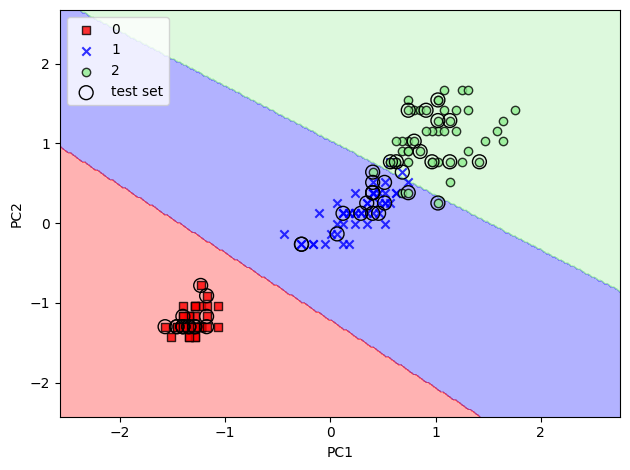

In [66]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



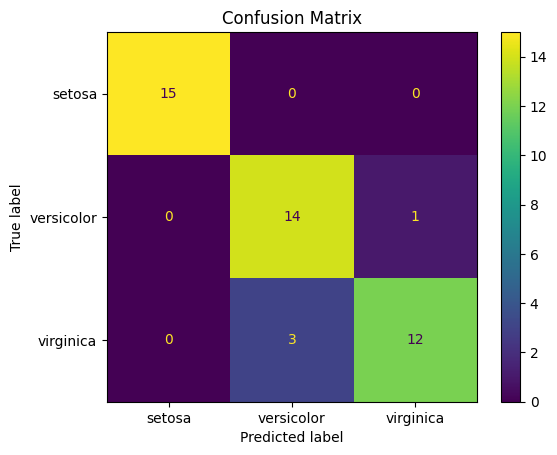

In [67]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = svm.predict(X_test_std)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_estimator(svm, X_test_std, y_test, display_labels=load_iris().target_names, cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

## 결정 트리 (Decision Tree)

- 분류 (Classification)와 회귀 (Regression) 문제에 모두 사용되는 지도학습 알고리즘
- 특성들을 기반으로 데이터를 분할하여 예측을 수행하는 트리 구조의 모델
- 각 내부 노드는 특성의 조건
- 각 가지 (branch)는 조건의 결과
- 각 리프 노드 (leaf node)는 예측 값

주요 특징
- **직관적**: 결정 트리는 시각적으로 표현 가능
- **비모수적 방법**: 데이터 분포에 대한 특정 가정을 필요로 하지 않음
- **해석 용이성**: 모델의 결정을 쉽게 해석 가능

기본 원리
1. 노드와 가지
   - 루트 노드 (Root Node): 트리의 최상단 노드로, 전체 데이터를 포함
   - 내부 노드 (Internal Node): 각 노드는 하나의 특성에 대한 조건을 의미
   - 리프 노드 (Leaf Node): 최종 예측 값
   - 가지 (Branch): 노드 간의 연결로, 조건의 결과
2. 분할
   - 데이터는 각 노드에서 하나의 특성을 기준으로 분할
   - 기준은 데이터의 지니 불순도 (Gini Impurity), 엔트로피 (Entropy), 분류 오차 (Classification Error) 등을 사용하여 결정

지니 불순도 (Gini impurity)

- 노드의 불순도를 측정하는 지표
- 노드가 한 클래스에 속할 확률이 높을수록 불순도가 낮아짐
- 데이터셋의 클래스 비율을 사용하여 계산
- 잘못 분류될 확률을 최소화하기 위한 기준
  $$
    I_G(t) = \sum_{i=1}^cp(i|t)(1 - p(i|t)) = 1 - \sum_{i=1}^cp(i|t)^2\\
  $$

엔트로피 (Entropy)
- 분할 전후의 엔트로피 차이
- 데이터의 불확실성을 나타내며, 클래스가 얼마나 혼합되어 있는지를 추정
  $$
    I_H(t) = -\sum_{i=1}^cp(i|t)\text{log}_2p(i|t)
  $$
  

분류 오차 (Classification Error)
- 가지치기에는 좋은 기준이지만 노드의 클래스 확률 변화에 덜 민감하기 때문에 결정 트리를 구성하는 데는 권장되지 않음

$$
I_E = 1 - \text{max}\{p(i|t)\}
$$

순서
1. 초기 데이터셋 $D$에서 불순도 지표 $I$를 계산
2. 각 특성 $t$에 대해 가능한 모든 값으로 데이터셋을 분할하고, 분할된 각 부분집합의 불순도 지표를 계산
3. 각 분할의 불순도 감소 $\Delta I$를 계산하고, 불순도 감소가 최대가 되는 특성 $t$를 선택하여 분할

**정보 이득 (Information Gain, IG)**

- 결정 트리 알고리즘은 트리의 루트에서 시작해서 정보 이득이 최대가 되는 특성으로 데이터를 나눔
- 부모 노드의 불순도와 자식 노드의 불순도 합의 차이
- 자식 노드의 불순도가 낮을수록 정보 이득이 커짐

$$
IG(D_p, f) = I(D_p) - \sum_{j=1}^m\frac{N_j}{N_p}I(D_j)\\
f: \text{분할에 사용할 특성}\\
D_p: \text{부모 노드의 데이터셋}\\
D_j: j\text{번째 자식 노드의 데이터셋}\\
I: \text{불순도 지표}
$$

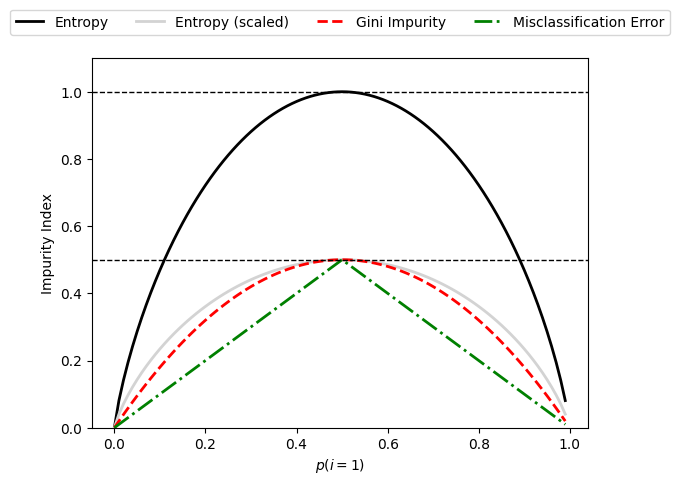

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p: np.ndarray) -> np.ndarray:
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p: np.ndarray) -> np.ndarray:
    p = np.clip(p, 1e-10, 1 - 1e-10)  # Clip p to avoid log(0)
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p: np.ndarray) -> np.ndarray:
    return 1 - np.maximum(p, 1 - p)

x = np.arange(0.0, 1.0, 0.01)
ent = entropy(x)
sc_ent = ent * 0.5
err = error(x)

fig, ax = plt.subplots()

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green']):
    ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('$p(i=1)$')
plt.ylabel('Impurity Index')
plt.show()

결정트리 장점
- 직관적이고 해석 용이: 결정 트리는 시각적으로 표현할 수 있어 이해와 해석이 용이함
- 데이터 전처리가 적음: 특성 스케일이나 정규화가 필요하지 않음
- 비모수적 방법: 데이터 분포에 대해 가정을 필요로 하지 않음
- 다양하 데이터 처리: 범주형 및 연속형 데이터를 모두 처리 가능

결정트리 단점
- 과적합: 결정트리는 깊어질수록 훈련 데이터에 과적합 (overfitting)위험이 큼
- 변동성: 데이터의 작은 변화에도 트리 구조가 크게 변할 수 있음
- 복잡한 모델: 너무 깊은 트리는 복잡해져서 오히려 해석이 어려움

예제

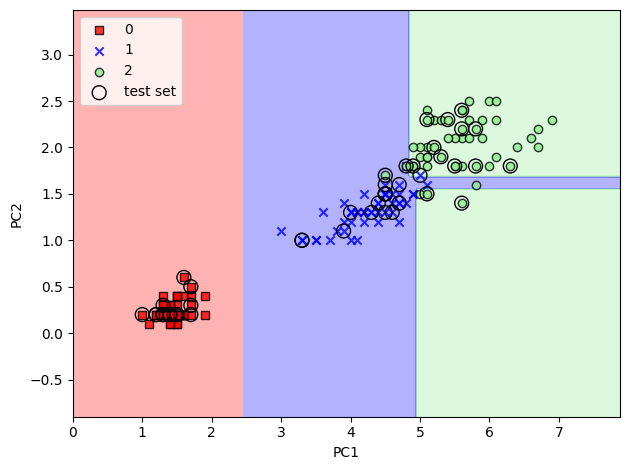

In [69]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=42)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree, test_idx=range(105, 150))
# xlabel과 ylabel에 [standardized]가 붙어있지만, 아님.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



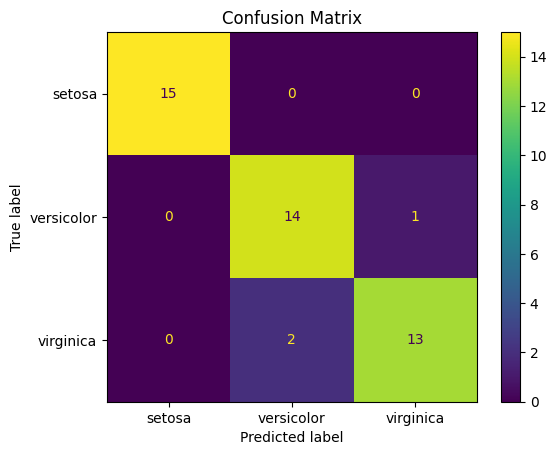

In [70]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, display_labels=load_iris().target_names, cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

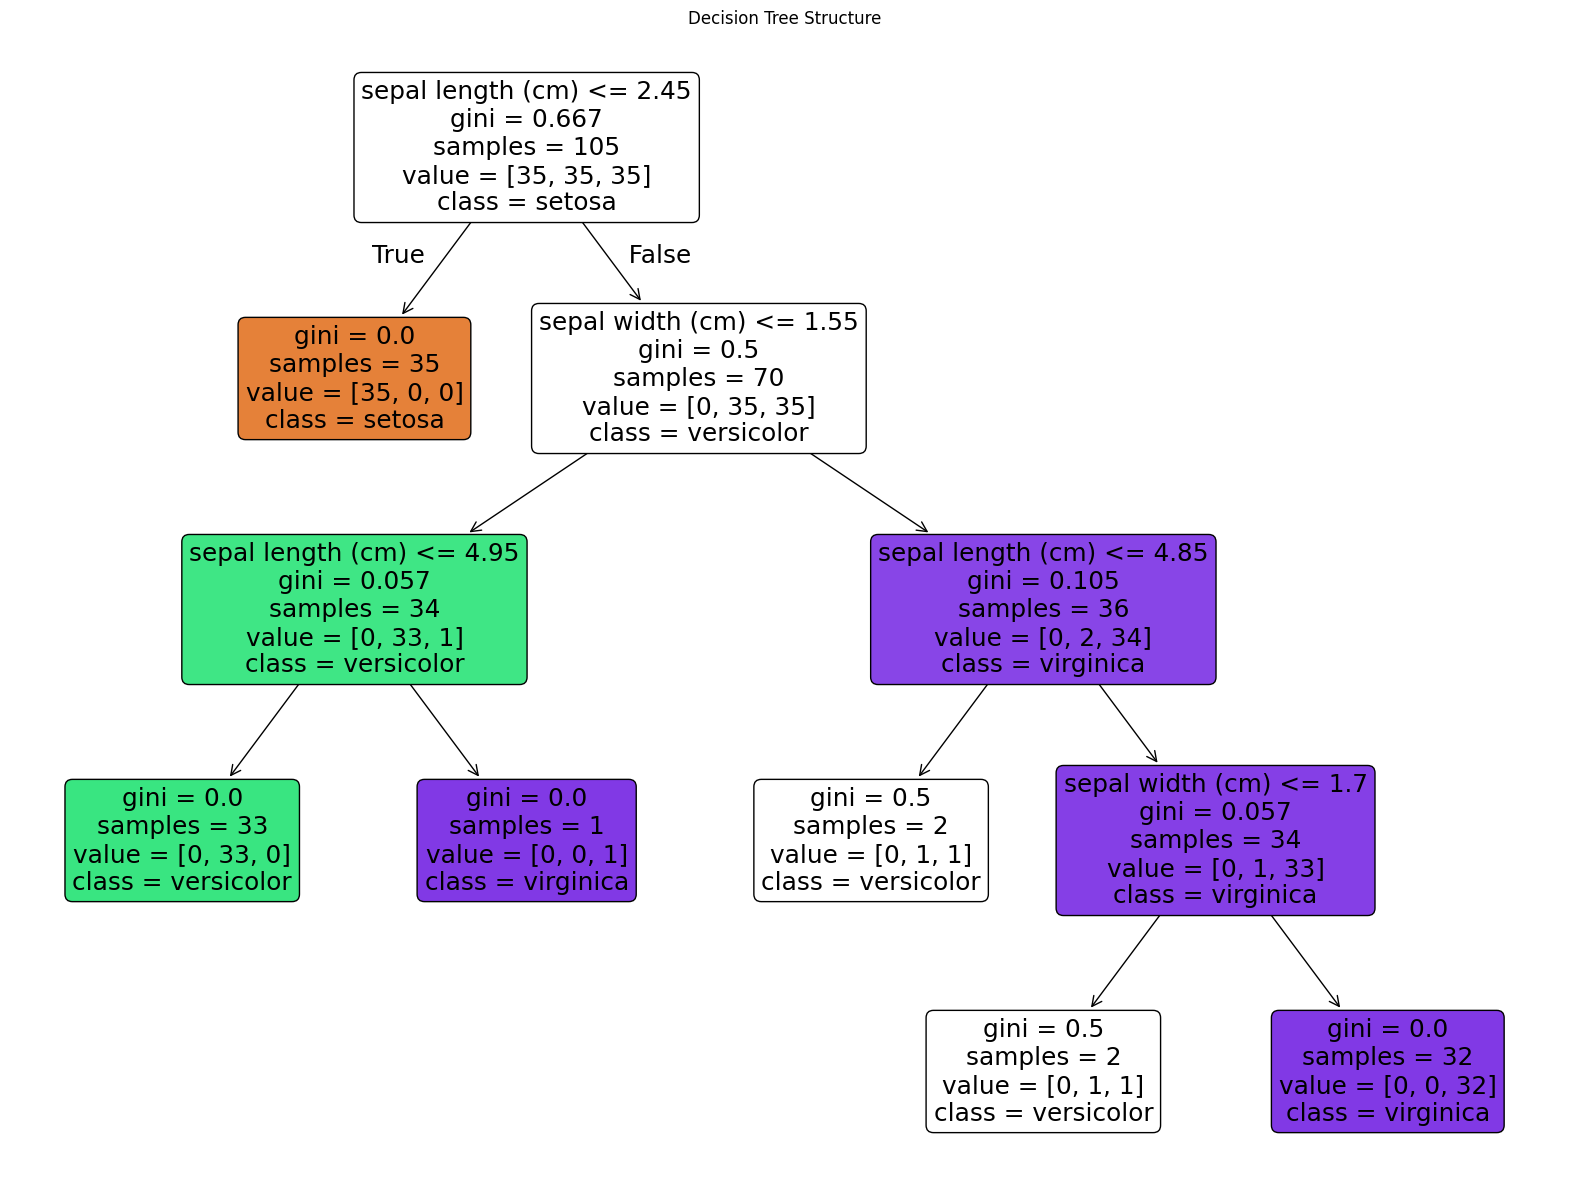

In [71]:
from sklearn.tree import plot_tree

# 결정 트리 구조 시각화
plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

## 랜덤 포레스트 (Random Forest)
- 분류 (Classification)와 회귀 (Regression) 문제에 모두 사용되는 지도학습 알고리즘
- 여러 개의 결정 트리 (Decision Tree)를 결합하여 예측 성능을 향상시키는 알고리즘

주요특징
- **다양성**: 각 트리가 서로 다른 부분집합의 데이터와 특성을 사용하여 학습하므로, 다양성을 갖추게 됨
- **앙상블 방법**: 여러 모델의 예측을 결합하여 성능을 향상
- **과적합 방지**: 개별 결정 트리의 과적합을 줄이고, 일반화 성능을 향상

기본 원리
1. 배깅 (Bootstrap Aggregating)
   - 부트스트랩 샘플링을 통해 여러 개의 데이터셋을 생성하고, 각 데이터셋을 사용하여 결정 트리를 학습
   - 부트스트랩 샘플링은 원본 데이터셋에서 중복을 허용하여 무작위로 샘플을 추출하는 방법
2. 랜덤 특성 선택
   - 각 결정 트리의 노드에서 분할할 때, 전체 특성 집합 중 무작위로 선택된 일부 특성만을 고려
   - 트리 간의 상관성을 줄이고 모델의 다양성을 높임
3. 결정 트리 생성
   - 부트스트랩 샘플링 데이터와 랜덤 특성으로 다수의 결정트리 생성
4. 예측 결합
   - 분류 문제의 경우, 각 트리의 예측 결과 중 다수결 (Marjority Vote)을 통해 최종 예측을 결정
   - 회귀 문제의 경우, 각 트리의 예측 값을 평균 (Average)하여 최종 예측을 결정

랜덤 포레스트 장점
- 높은 예측 성능: 여러 트리의 예측을 결합하여 성능 향상
- 과적합 방지: 개별 트리의 과적합을 줄이고, 일반화 성능 향상
- 다양한 데이터 처리: 범주형 및 연속형 데이터를 모두 처리 가능
- 변수 중요도: 각 특성의 중요도를 평가 가능

랜덤 포레스트 단점
- 복잡성: 많은 트리를 학습하고 예측을 결합해야 하므로, 계산 비용은 높음
- 해석 어려움: 개별 트리는 해석이 쉬우나, 전체 랜덤 포레스트 모델은 해석이 어려움
- 메모리 사용량: 많은 트리를 저장해야 하므로, 메모리 사용량이 큼

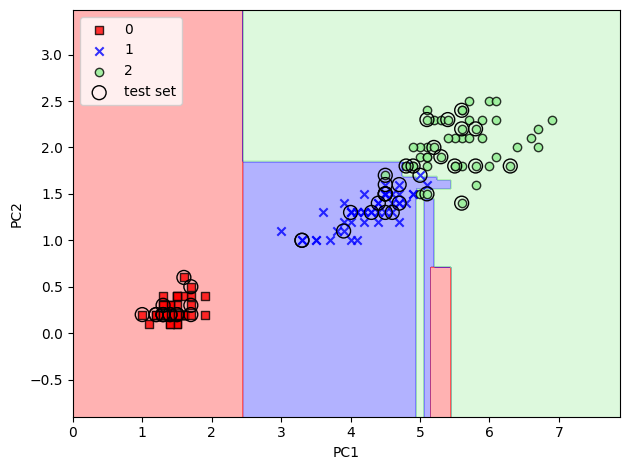

In [72]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=42,
                                n_jobs=-1)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))
# 결정 트리와 마찬가지로 xlabel과 ylabel 주의

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



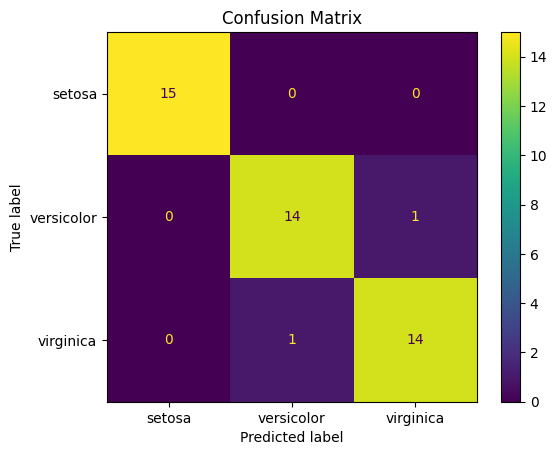

In [73]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, display_labels=load_iris().target_names, cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

## 신경망 (Neural Network) - 다층 퍼셉트론

- 다층 퍼셉트론 (MultiLayer Perceptron, MLP)은 인공 신경망의 한 종류
- 비선형 활성화 함수를 사용하여 복잡한 패턴을 학습할 수 있으며, 주로 분류와 회귀 문제에 사용
- 입력층, 하나 이상의 은닉층, 출력층으로 구성된 피드포워드 신경망
- 각 뉴런은 이전 층의 뉴련으로부터 입력을 받아 가중치를 적용하고, 활성화 함수를 통해 출력을 생성

다층 퍼셉트론 구조
- 입력층 (Input Layer): 모델에 입력되는 데이터를 받는 층
- 은닉층 (Hidden Layer): 입력층과 출력층 사이에 위치하며, 데이터를 처리하고 특징을 추출
- 출력층 (Output Layer): 모델의 최종 예측 값을 출력하는 층

기본 원리
1. 뉴런
   - 입력 값과 가중치로 가중합을 계산하고, 활성화 함수를 통해 출력을 생성
  $$
    z = \sum_{i=1}^n\mathbf{w}_i\mathbf{x}_i + b\\
    a = \sigma(z)
  $$
2. 활성화 함수
   - 뉴런의 출력을 비선형 변환
   - 시그모이드 함수: $\sigma(z) = \frac{1}{1 + e^{-z}}$
3. 순방향 저달
   - 입력 데이터가 입력층에서 은닉층을 거쳐 출력층으로 전달되며, 각 뉴런에서 계산된 출력 값이 다음 층의 입력으로 사용
4. 손실함수
   - 모델의 예측 값과 실제 값 간의 차이를 측정하는 함수
   - 평균제곱오차 (Mean Squared Error, MSE)
  $$
    L(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^n(\mathbf{y}_i - \hat{\mathbf{y}}_i)^2
  $$
  - 교차 엔트로피 손실 (Cross-Entropy Loss)
  $$
   L(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{i=1}^n\mathbf{y}_i\text{log}(\hat{\mathbf{y}}_i)
  $$
5. 역전파
   - 손실 함수를 최소화하기 위해 가중치와 바이어스를 조정하는 과정
   - 각 층의 가중치와 바이어스에 대한 손실 함수의 기울기를 계산하여, 경사 하강법 (Gradient Descent)을 사용해 업데이트

다층 퍼셉트론 장점
- 비선형성: 비선형 활성화 함수를 사용하여 복잡한 패턴과 관계를 학습 가능
- 표현력: 여러 개의 은닉층을 통해 높은 표현력을 갖고, 다양한 문제 해결 가능
- 유연성: 다양한 구조와 활성화 함수를 사용하여 다양한 유형의 데이터를 처리 가능

다층 퍼셉트론 단점
- 계산 비용: 대규모 데이터셋에서 학습 시간이 오래 걸리고, 계산 비용이 높음
- 과적합: 모델이 지나치게 복잡해지면 과적합 (overfitting)이 발생할 가능성 높음
- 해석 어려움: 많은 파라미터와 은닉층을 가지므로, 모델의 내부 동작은 해석 어려움

Iteration 1, loss = 1.71188304
Iteration 2, loss = 1.67041391
Iteration 3, loss = 1.66365003
Iteration 4, loss = 1.66245940
Iteration 5, loss = 1.65930701
Iteration 6, loss = 1.65890064
Iteration 7, loss = 1.65909574
Iteration 8, loss = 1.65776860
Iteration 9, loss = 1.65710055
Iteration 10, loss = 1.65615525
Iteration 11, loss = 1.65656764
Iteration 12, loss = 1.65442683
Iteration 13, loss = 1.65290256
Iteration 14, loss = 1.65408635
Iteration 15, loss = 1.65164124
Iteration 16, loss = 1.65099361
Iteration 17, loss = 1.65178423
Iteration 18, loss = 1.65058459
Iteration 19, loss = 1.65048174
Iteration 20, loss = 1.65096868


c:\ProgramData\Anaconda3\envs\orderly\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


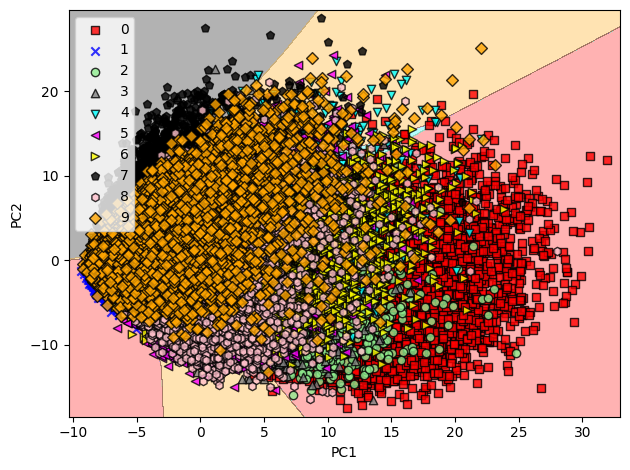

In [74]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier


mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_combined_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))
test_idx = range(X_train_pca.shape[0], X_combined_pca.shape[0])

mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=0.1)
mlp.fit(X_train_pca, y_train)

plot_decision_regions(X_combined_pca, y_combined, classifier=mlp)

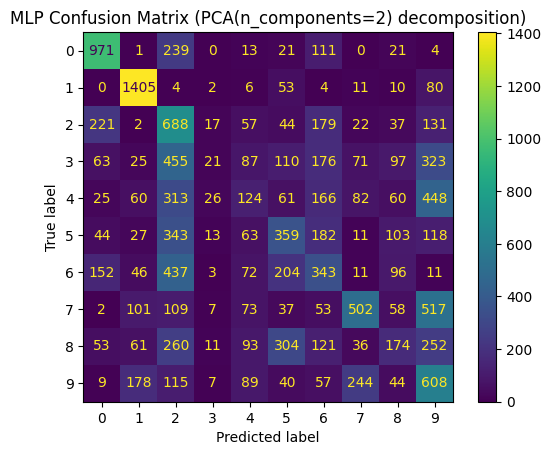

In [75]:
ConfusionMatrixDisplay.from_estimator(mlp, X_test_pca, y_test)
plt.title("MLP Confusion Matrix (PCA(n_components=2) decomposition)")
plt.show()